## 基礎題 - 算出斜率w與截距b

y = wx + b

記得計算前X須符合資料格式
$$[x_1, x_2, \ldots, x_{50}]$$

==> 

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])

In [3]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
from sklearn.linear_model import LinearRegression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [4]:
#將模型工具指派給一變數做使用
regr_lin = LinearRegression()

In [5]:
#注意轉換x得格式1D->2D
X = x.reshape(-1, 1)
print(X.shape)

(50, 1)


In [6]:
#將x,y資料導入LinearRegression演算法做訓練
regr_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
#列印出訓練完成之函數的斜率與截距
print('Coefficients: ', regr_lin.coef_)
print('interception: ', regr_lin.intercept_)

Coefficients:  [1.61701852]
interception:  0.27312968949421723


In [8]:
# mse
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.26267606969489105


## 進階題 - 切割資料集分別做訓練與預測(訓練資料80%、測試資料20%)


In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])
y = np.array([ 0.85848224, -0.10657947,  1.42771901,  0.53554778,  1.20216826,
        1.81330509,  1.88362644,  2.23557653,  2.7384889 ,  3.41174583,
        4.08573636,  3.82529502,  4.39723111,  4.8852381 ,  4.70092778,
        4.66993962,  6.05133235,  5.44529881,  7.22571332,  6.79423911,
        7.05424438,  7.00413058,  7.98149596,  7.00044008,  7.95903855,
        9.96125238,  9.06040794,  9.56018295,  9.30035956,  9.26517614,
        9.56401824, 10.07659844, 11.56755942, 11.38956185, 11.83586027,
       12.45642786, 11.58403954, 11.60186428, 13.88486667, 13.35550112,
       13.93938726, 13.31678277, 13.69551472, 14.76548676, 14.81731598,
       14.9659187 , 15.19213921, 15.28195017, 15.97997265, 16.41258817])


In [10]:
#匯入在sklearn.linear_model套件裡面的LinearRegression模型
from sklearn.linear_model import LinearRegression

In [11]:
#匯入在sklearn.model_selection套件裡面的train_test_split模組
from sklearn.model_selection import train_test_split

In [12]:
#切割數據集(訓練資料80%、測試資料20%，設定random_state=20)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)  

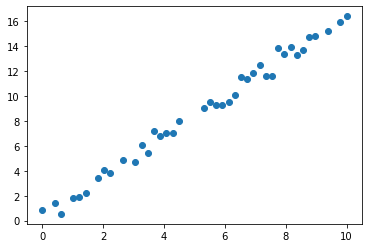

In [13]:
#畫出訓練資料集的matplotlib圖形
plt.scatter(x_train, y_train)

## 用訓練資料來 fit 函數
1. 只用訓練資料集的資料進行linear regression演算法<br>
2. 並計算出訓練階段的MSE
3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_train.PNG)

In [19]:
regr = LinearRegression()

In [20]:
x_train.shape

(40,)

In [21]:
X_train = x_train.reshape(-1,1)
X_train.shape

(40, 1)

In [22]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print('Coefficients: ', regr.coef_)
print('interception: ', regr.intercept_)

Coefficients:  [1.60659227]
interception:  0.36802581786862376


In [28]:
# mse
Y_train = regr.predict(X_train)
print(np.sum((Y_train-y_train)**2) / len(y_train))

0.2284495300761316


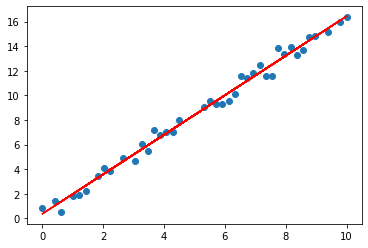

In [29]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

## 將訓練出來的函數預測測試集的X值
1. 使用剛剛訓練出來的模型進行測試資料集的資料預測*注意reshape<br>
使用X = 2.44897959，預測出來數值應該為 4.3025375<br>
所有測試集資料
$$\widehat{y}=xw+b=w_{1}x_{1}+b$$

In [30]:
x_test.shape

(10,)

In [31]:
X_test = x_test.reshape(-1,1)
Y_test = regr.predict(X_test)

In [34]:
#Y=WX+b
W=regr.coef_
b=regr.intercept_
W*X_test+b

array([[ 4.3025375 ],
       [ 4.95828946],
       [ 1.67952971],
       [ 2.99103361],
       [15.12244466],
       [ 0.69590179],
       [ 8.56492518],
       [ 8.23704919],
       [15.7781966 ],
       [ 7.90917322]])

In [35]:
W*2.44897959+b

array([4.3025375])

2. 並計算出測試階段的MSE

In [32]:
print(np.sum((Y_test-y_test)**2) / len(y_test))

0.41344072565862955


3. 畫出目標點(藍色)與預測點(紅色)的對應圖
![](images/LR_test.PNG)

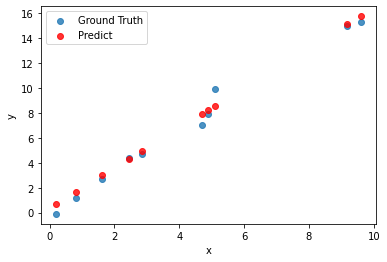

In [33]:
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x_test, y_test,alpha=0.8,label='Ground Truth')
plt.scatter(x_test, Y_test, c='r', alpha=0.8,label='Predict')
plt.legend()